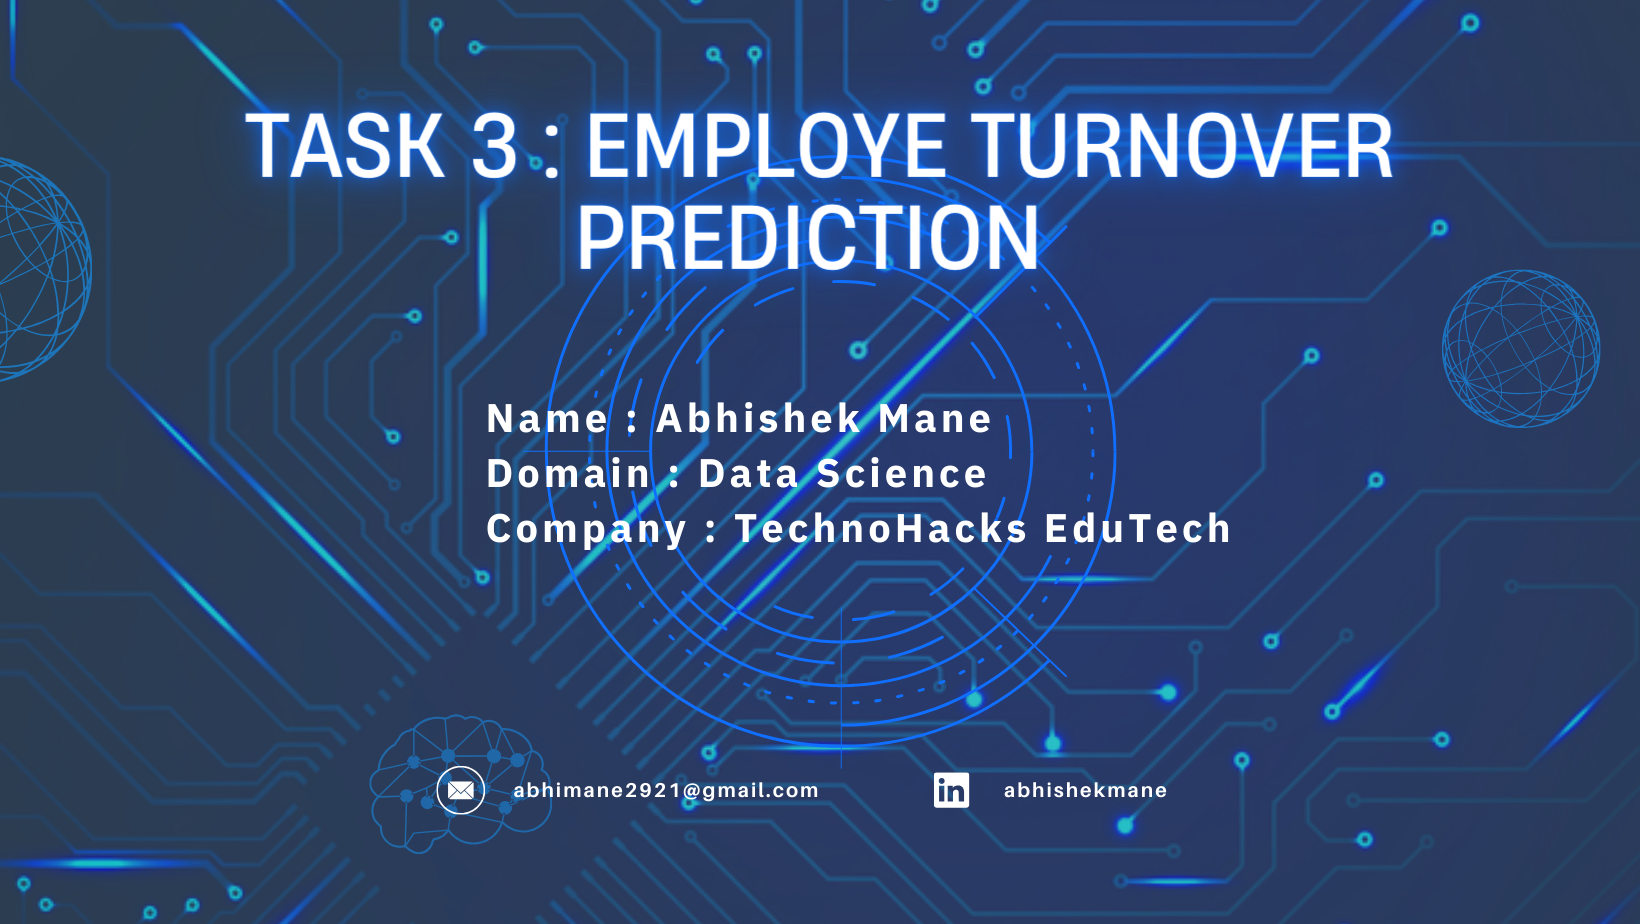

# Task 3 : Employee Turnover Prediction 

Use a dataset of employee information and
build a model that can predict which
employees are most likely to leave the
company

**Datasets :** IBM HR Analytics Employee Attrition & Performance (Kaggle)

+ overview of the dataset's columns:

1. Age: The age of the employee.
2. BusinessTravel: The frequency of business travel. Categories may include "Travel_Rarely," "Travel_Frequently," and "Non-Travel."
3. DailyRate: The daily rate or salary of the employee.
4. Department: The department in which the employee works (e.g., "Research & Development," "Sales," "Human Resources").
5. DistanceFromHome: The distance from the employee's home to the workplace.
6. Education: The employee's level of education, typically ranging from 1 (low) to 5 (high).
7. EducationField: The field of education or specialization of the employee (e.g., "Life Sciences," "Medical," "Marketing").
8. EmployeeNumber: A unique identifier for each employee (not typically useful for analysis).
9. EnvironmentSatisfaction: Employee satisfaction with the work environment, often on a scale from 1 (low) to 4 (high).
10. Gender: The gender of the employee.
11. HourlyRate: The hourly rate or salary of the employee.
12. JobInvolvement: Employee's job involvement or engagement, often on a scale from 1 (low) to 4 (high).
13. JobLevel: The employee's job level or position within the company.
14. JobRole: The specific role or job title of the employee (e.g., "Sales Executive," "Research Scientist").
15. JobSatisfaction: Employee satisfaction with their job, often on a scale from 1 (low) to 4 (high).
16. MaritalStatus: The marital status of the employee (e.g., "Married," "Single," "Divorced").
17. MonthlyIncome: The monthly income of the employee.
18. MonthlyRate: The monthly rate or salary of the employee.
19. NumCompaniesWorked: The number of companies the employee has worked for.
20. Over18: A binary variable indicating whether the employee is over 18 (not typically useful for analysis).
21. OverTime: Whether the employee works overtime (e.g., "Yes" or "No").
22. PercentSalaryHike: The percentage increase in salary for the employee.
23. PerformanceRating: Employee performance rating, often on a scale from 3 to 4.
24. RelationshipSatisfaction: Employee satisfaction with their relationships at work, often on a scale from 1 (low) to 4 (high).
25. StandardHours: The standard number of working hours for employees (not typically useful for analysis).
26. StockOptionLevel: The level of stock options provided to the employee.
27. TotalWorkingYears: The total number of years the employee has worked.
28. TrainingTimesLastYear: The number of training times the employee attended last year.
29. WorkLifeBalance: Employee's perceived work-life balance, often on a scale from 1 (low) to 4 (high).
30. YearsAtCompany: The number of years the employee has worked at the current company.
31. YearsInCurrentRole: The number of years the employee has been in the current job role.
32. YearsSinceLastPromotion: The number of years since the employee's last promotion.
33. YearsWithCurrManager: The number of years the employee has worked with the current manager.
34. Attrition: The target variable indicating whether the employee has left the company ("Yes" or "No").


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

Text(0, 0.5, 'Count')

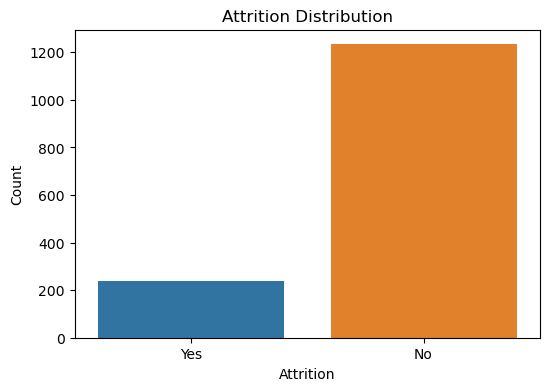

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=dataset)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

In [5]:
numerical_features = dataset.select_dtypes(include=[np.number])
print("Numerical Features Summary:")
print(numerical_features.describe())

Numerical Features Summary:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std  

In [6]:
categorical_features = dataset.select_dtypes(include=['object'])  # Corrected data type specification
print("Categorical Features Summary:")
print(categorical_features.describe())

Categorical Features Summary:
       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


Text(0.5, 1.0, 'Correlation Matrix')

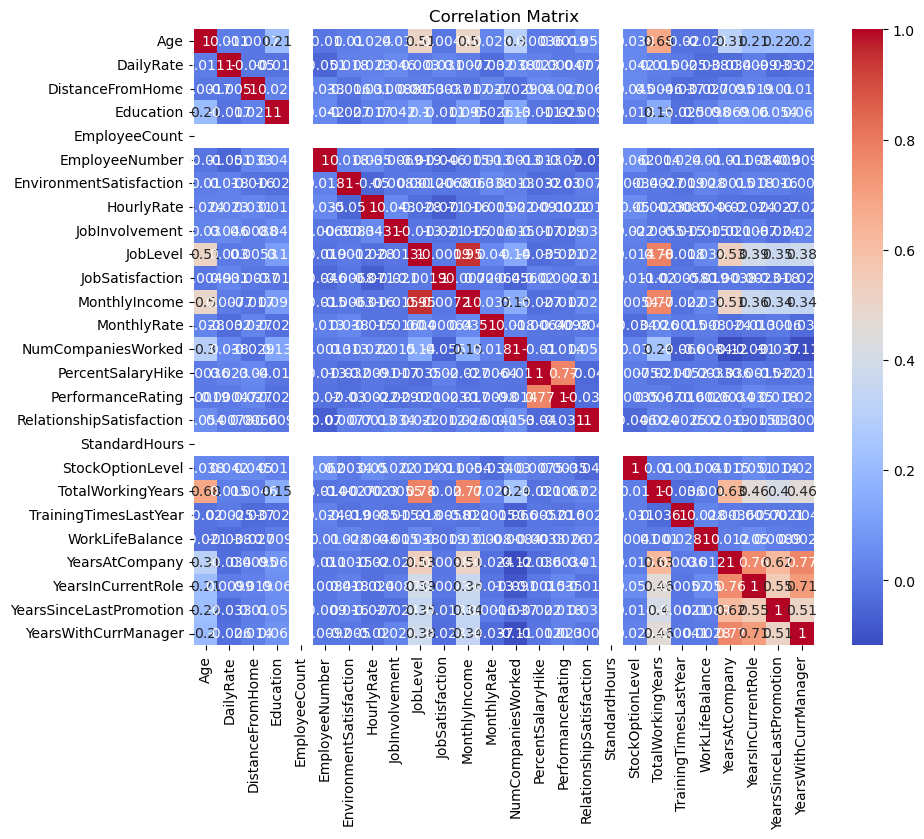

In [7]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


In [8]:
dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})

categorical_features = dataset.select_dtypes(include=['object']).columns
for feature in categorical_features:
    dummies = pd.get_dummies(dataset[feature], prefix=feature, drop_first=True)
    dataset = pd.concat([dataset, dummies], axis=1)
    dataset.drop(feature, axis=1, inplace=True)

correlation_with_attrition = dataset.corr()['Attrition'].sort_values(ascending=False)
print("Correlation with Attrition:")
print(correlation_with_attrition)


Correlation with Attrition:
Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Educat

In [9]:
selected_features = correlation_with_attrition[(correlation_with_attrition > 0.1) | (correlation_with_attrition < -0.1)]
selected_feature_names = selected_features.index.tolist()
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['Attrition', 'OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']


In [10]:
X = dataset[selected_feature_names]

In [11]:
lb = LabelEncoder()
dataset['Attrition'] = lb.fit_transform(dataset['Attrition'])

columns_to_drop = ['EmployeeCount', 'StandardHours', 'EmployeeNumber']

columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]

if columns_to_drop:
    dataset = dataset.drop(columns_to_drop, axis=1)

categorical_features = dataset.select_dtypes(include=['object']).columns
dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']


In [12]:
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\ABHI MANE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
188 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHI MANE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHI MANE\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ABHI MANE\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ABHI MANE\anac

Best Hyperparameters:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [14]:
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)




Model Evaluation Metrics:
Accuracy: 0.8668

Confusion Matrix:
[[311   0]
 [ 49   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       311
           1       1.00      0.14      0.25        57

    accuracy                           0.87       368
   macro avg       0.93      0.57      0.59       368
weighted avg       0.88      0.87      0.82       368



Text(0.5, 1.0, 'Feature Importance')

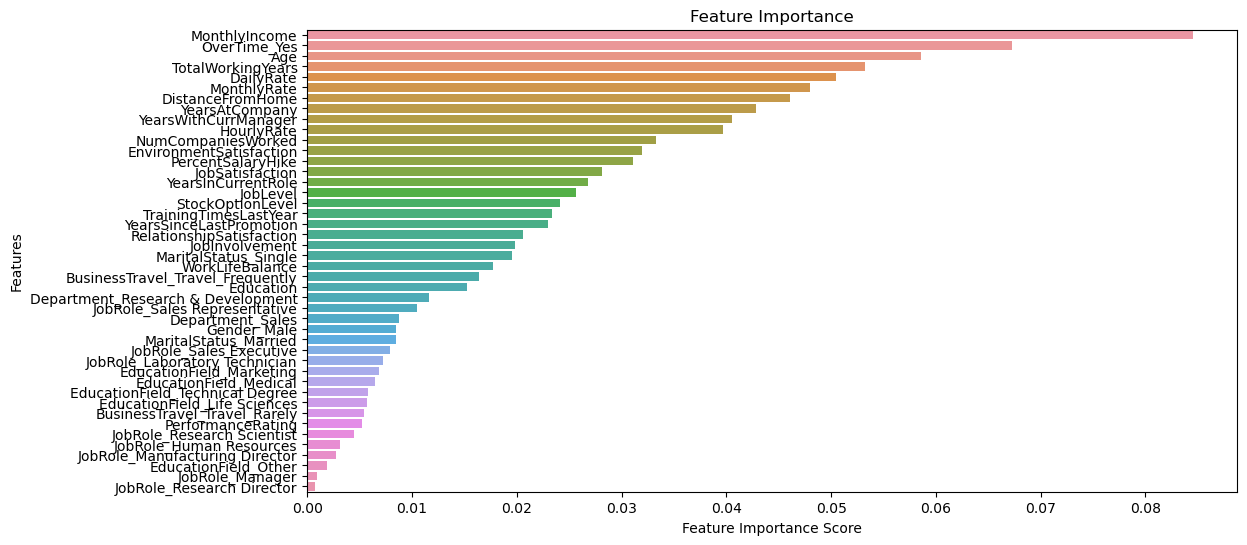

In [19]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')

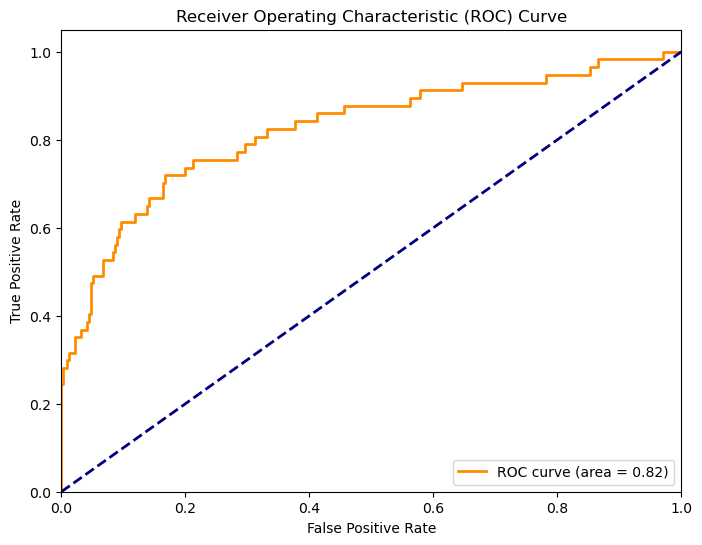

In [20]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

(0.0, 1.0)

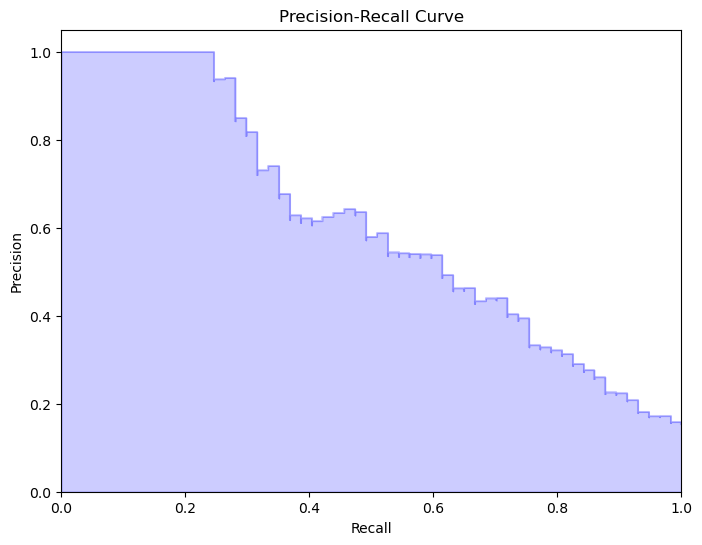

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', alpha=0.2)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Text(0.5, 1.0, 'Top 10 Feature Importance')

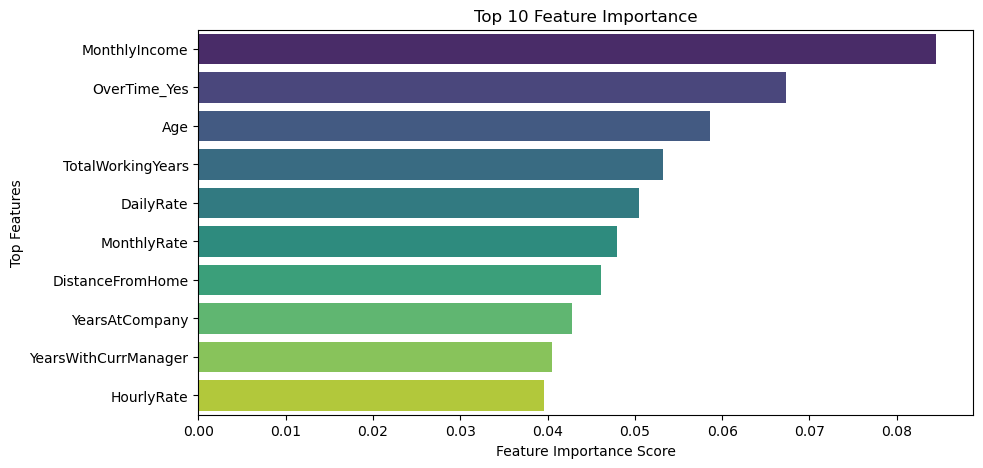

In [23]:
N = 10
top_N_features = feature_importances[:N]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_N_features, y=top_N_features.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Top Features')
plt.title(f'Top {N} Feature Importance')

- [x] Completed task
- [ ] Incomplete task


> -----------Thank You----------